<a href="https://colab.research.google.com/github/mariaefoliveira/Analise_Titanic/blob/main/An%C3%A1lise_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de sobrevivência dos passageiros do Titanic**
>  **Maria Eduarda Falcão de Oliveira**

#### Observação:
_A intenção deste projeto é analisar a base de dados existente sobre o titanic e aprofundar os conhecimentos sobre análise de dados._

_Os dados utilizados serão do arquivo "treino" (train.csv)._

## **Resumo**:


> As questões trabalhadas foram focadas nas **classes** dos sobreviventes, **taxa** paga, e a **média** da idade dos passageiros, fazendo uma divisão entre os sexos para entender se houve alguma ligação real na sobrevivência dos passageiros do **Titanic**.



# Instalação, importação e descompactação do arquivo

In [ ]:
#instalando pandas, numpy, seaborn e matplotlib
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib

In [ ]:
#Importação dos itens necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

--------
# Análise Exploratória

In [ ]:
#Adicionando dados em um arquivo pandas
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')

#### Train

In [ ]:
train_df.shape

(891, 12)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#Verificando se tem alguma informação repetida
print('Número de ids únicos: ', train_df['PassengerId'].nunique())

print('\nNúmero de linhas da tabela: ', train_df.shape[0])

Número de ids únicos:  891

Número de linhas da tabela:  891


In [ ]:
#Contando valores nulos
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
train_df.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


## Renomeando colunas

In [ ]:
# Renomeando colunas usando o método .rename()
train_df.rename(columns={
    'PassengerId': 'Id_Passageiro',
    'Survived': 'Sobrevivente', #0=Não, 1=Sim
    'Pclass': 'Tipo_Bilhete', #1=1ªClasse, 2=2ªClasse, 3=3ªClasse
    'Name': 'Nome',
    'Sex': 'Sexo', #Feminino/Masculino
    'Age': 'Idade',
    'SibSp': 'Qtd_Irmaos_Conjuges',
    'Parch': 'Qtd_Pais_filhos',
    'Ticket': 'Num_Bilhete',
    'Fare': 'Tarifa_Passageiro',
    'Cabin': 'Num_Cabine',
    'Embarked': 'Porto_de_Embarque' #C = Cherbourg, Q = Queenstown S = Southampton
}, inplace=True)

# Exibindo as primeiras linhas para verificar os nomes das colunas
display(train_df.head(6))

,Id_Passageiro,Sobrevivente,Tipo_Bilhete,Nome,Sexo,Idade,Qtd_Irmaos_Conjuges,Qtd_Pais_filhos,Num_Bilhete,Tarifa_Passageiro,Num_Cabine,Porto_de_Embarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


## Tratamento dos Dados

### - Categorizando colunas

In [ ]:
#Tornando tipo categórico de Sim e Não, os itens que só possuem 2 valores únicos (1 e 0)
train_df['Sobrevivente'] = train_df['Sobrevivente'].astype('category')
#renomear os itens categóricos 0 = Não e 1 = Sim
train_df['Sobrevivente'] = train_df['Sobrevivente'].cat.rename_categories(['Não', 'Sim'])

In [ ]:
train_df['Tipo_Bilhete'] = train_df['Tipo_Bilhete'].astype('category')
train_df['Tipo_Bilhete'] = train_df['Tipo_Bilhete'].cat.rename_categories(['1ª Classe', '2ª Classe', '3ª Classe'])

In [ ]:
train_df['Sexo'] = train_df['Sexo'].astype('category')
train_df['Sexo'] = train_df['Sexo'].cat.rename_categories(['Feminino','Masculino'])

In [ ]:
#Categorizando a coluna 'Porto_de_Embarque'
train_df['Porto_de_Embarque'] = train_df['Porto_de_Embarque'].astype('category')
#Renomeando para C = Cherbourg, Q = Queenstown S = Southampton
train_df['Porto_de_Embarque'] = train_df['Porto_de_Embarque'].cat.rename_categories(['Cherbourg', 'Queenstown', 'Southampton'])

In [ ]:
#Convertendo idade para inteiro e mantendo nulo, representando nulo como -1
train_df['Idade'] = train_df['Idade'].fillna(-1).astype(int)
train_df['Idade'] = train_df['Idade'].replace(-1, pd.NA)

In [ ]:
train_df.head()

,Id_Passageiro,Sobrevivente,Tipo_Bilhete,Nome,Sexo,Idade,Qtd_Irmaos_Conjuges,Qtd_Pais_filhos,Num_Bilhete,Tarifa_Passageiro,Num_Cabine,Porto_de_Embarque
0,1,Não,3ª Classe,"Braund, Mr. Owen Harris",Masculino,22,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,Sim,1ª Classe,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Feminino,38,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,Sim,3ª Classe,"Heikkinen, Miss. Laina",Feminino,26,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,Sim,1ª Classe,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Feminino,35,1,0,113803,53.1000,C123,Southampton
4,5,Não,3ª Classe,"Allen, Mr. William Henry",Masculino,35,0,0,373450,8.0500,NaN,Southampton


#### Porcentagem de passageiros que possuem idade nula

In [ ]:
# Número total de passageiros
total_passageiros = train_df.shape[0]

# Número de valores nulos na coluna 'Idade'
nulos_idade = train_df['Idade'].isnull().sum()

# Calculando a porcentagem de nulos em 'Idade'
porcentagem_nulos_idade = (nulos_idade / total_passageiros) * 100

print(f"Número total de passageiros: {total_passageiros}")
print(f"Número de valores nulos na coluna 'Idade': {nulos_idade}")
print(f"Porcentagem de dados nulos em 'Idade': {porcentagem_nulos_idade:.2f}%")

Número total de passageiros: 891
Número de valores nulos na coluna 'Idade': 177
Porcentagem de dados nulos em 'Idade': 19.87%


#### Outliers de passageiros com idade acima da média

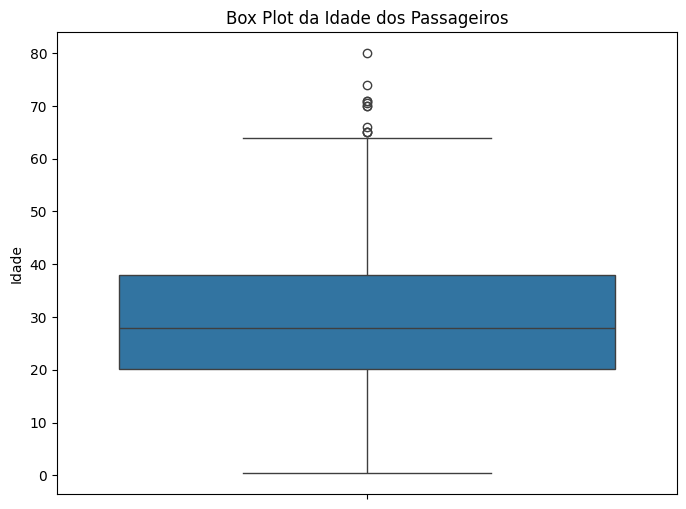

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crie o box plot da coluna 'Idade'
plt.figure(figsize=(8, 6))
sns.boxplot(y=train_df['Idade'])
plt.title('Box Plot da Idade dos Passageiros')
plt.ylabel('Idade')
plt.show()

#### Por conta das outliners existentes para idade, será feito uma mediana para preencher os dados nulos e equilibrar a base de dados, pois são cerca de `177` dados da coluna "Idade" que estão nulos dos `891`.

#### Preenchendo idade nula com a mediana

In [ ]:
# Calculando a mediana da idade
mediana_idade = train_df['Idade'].median()

# Preenchendo os valores nulos na coluna 'Idade' com a mediana
# Usando inplace=True para modificar o DataFrame original
train_df['Idade'].fillna(mediana_idade, inplace=True)

# Verificando se ainda há valores nulos na coluna 'Idade' após o preenchimento
print("Num de valores nulos na coluna 'Idade':", train_df['Idade'].isnull().sum())

# Exibindo as primeiras linhas para verificar as mudanças
train_df[['Nome', 'Idade']].head()

Num de valores nulos na coluna 'Idade': 0


/tmp/ipython-input-1162097232.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Idade'].fillna(mediana_idade, inplace=True)


,Nome,Idade
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0


# Baixando planilha

In [ ]:
train_df.to_csv('titanic_train.csv', index= False)

----------
# Análise e Visualização




---


A partir de agora, a análise realizada foi feita com o auxílio do Power BI, então o que eu deixarei em seguida, serão os prints das análises.

> Obs: Você também pode estar visualizando através do arquivo powerBI disponível no github

O arquivo pode ser encontrado com o nome "Relatório de sobreviventes do Titanic.pbix" na página principal

Link: https://github.com/mariaefoliveira/Analise_Titanic/tree/main




---



## Número de Passageiros

In [ ]:
# Contando valores nulos novamente para confirmar
print("Valores nulos no DataFrame:")
print("\nIdade: ", train_df['Idade'].isnull().sum())
print("Porto_de_Embarque: ",train_df["Porto_de_Embarque"].isnull().sum())

Valores nulos no DataFrame:

Idade:  0
Porto_de_Embarque:  2


O número de passageiros registrados no arquivo treino era de:

!["Número de Passageiros registrados"](https://github.com/mariaefoliveira/Analise_Titanic/blob/main/Imagem-Print/Passageiros/Num%20de%20passageiros%20registrados.png?raw=true)

Sendo identificado alguns dados nulos que não fariam muita diferença na análise atual, então não foi considerado a exclusão ou tratamento definitivo do `Porto de Embarque`.

## Número de Passageiros por Sexo



Sexo Feminino: **314**

Sexo Masculino: **577**

Foi identificado que nos dados da planilha, haviam mais informações de `homens` do que de `mulheres` a bordo.

Ocupando cerca de `64,76%` da tabela.


!["Número de passageiros por Sexo"](https://github.com/mariaefoliveira/Analise_Titanic/blob/main/Imagem-Print/Passageiros/Num%20de%20passageiros%20por%20Sexo.png?raw=true)


## Passageiros por classe



!["Classe"](https://github.com/mariaefoliveira/Analise_Titanic/blob/main/Imagem-Print/Passageiros/Num%20de%20passageiros%20por%20tipo%20Classe.png?raw=true)

Foram identificados um maior número de pessoas da primeira e terceira classe, mas isso pode estar intrísecamente relacionado a idade. Mas analisando superficialmente, `491` dos passageiros eram da 3ª classe e `216` da 1ª classe, sendo a `2ª classe` a de menor registro.

## Taxa de sobrevivência

![](https://github.com/mariaefoliveira/Analise_Titanic/blob/main/Imagem-Print/Passageiros/Porc_Sobreviventes_Sexo_e_Idade.png?raw=true)


### Por Classe

Foi identificado que o sexo `feminino` teve uma taxa de sobrevivência maior, onde:



#### 1ª Classe
Houve um menor número de mulheres falecidas e uma taxa maior de sobrevivência.

![](https://github.com/mariaefoliveira/Analise_Titanic/blob/main/Imagem-Print/Passageiros/Taxa_sobrev_1_classe.png?raw=true)



#### 2ª Classe
O resultado foi até um pouco similar a primeira classe, comparado com o número de mulheres que não conseguiram sobreviver que eram da 2ª classe, é um valor até positivo.

![](https://github.com/mariaefoliveira/Analise_Titanic/blob/main/Imagem-Print/Passageiros/Taxa_sobrev_2_classe.png?raw=true)


#### 3ª Classe
Não houve uma queda visível na sobrevivência de mulheres, mas a porcentagem (ou número de mulheres que sobreviveram), se mantém igual. O que não é muito positivo se comparado ao total de mulheres presentes na terceira classe.

![](https://github.com/mariaefoliveira/Analise_Titanic/blob/main/Imagem-Print/Passageiros/Taxa_sobrev_3_classe.png?raw=true)



### Por idade

Por idade, foi optado por fazer a separação por blocos de 10 em 10.

De modo geral, pessoas com mais de 80 anos, houve apenas 1 indivíduo registrado, e esse 1 sobreviveu, de 70 à 79, ninguém sobreviveu.



#### 1ª Classe

Sobrevivência moderada, mas ainda assim baixa, considerando o número de pessoas falecidas.

![](https://github.com/mariaefoliveira/Analise_Titanic/blob/main/Imagem-Print/Passageiros/taxa_sobrev_idade_1.png?raw=true)



#### 2ª Classe

Taxa de sobrevivência foi baixa, mas ainda assim teve baixo número de falecidos, também devemos considerar que não tiveram tantos passageiros da 2ª classe comparado a 1ª e 3ª classe, por isso os valores baixos.

![](https://github.com/mariaefoliveira/Analise_Titanic/blob/main/Imagem-Print/Passageiros/taxa_sobrev_idade_2.png?raw=true)


#### 3ª Classe

Quanto mais novo o passageiro, diferente das anteriores, maior a possibilidade de falecimento, o número de crianças falecidas que eram de terceira classe, entrou em destaque neste gráfico pelo valor exorbitante.

Dentre as crianças falecidas (do valor total), a 3ª Classe foi a que teve maior número de óbitos, `30%` delas sobreviveram.

![](https://github.com/mariaefoliveira/Analise_Titanic/blob/main/Imagem-Print/Passageiros/taxa_sobrev_idade_3.png?raw=true)

## Análise Demográfica

Muitos dos passageiros a bordo que foram registrados, embarcaram no porto `Southampton`, tendo recebido um diferencial de até 500 passageiros comparado aos outros portos.

A faixa Etária dos passageiros era de uma média `30 anos`.

Tarifa Média Geral:

![](https://github.com/mariaefoliveira/Analise_Titanic/blob/main/Imagem-Print/Demografico/Tarifa-Geral.png?raw=true)

<img src="https://github.com/mariaefoliveira/Analise_Titanic/blob/main/Imagem-Print/Demografico/N%C3%BAmero%20de%20Passageiro%20-%20Porto%20-%20Geral.png?raw=true" width="700">

![](https://github.com/mariaefoliveira/Analise_Titanic/blob/main/Imagem-Print/Demografico/Sozinho-em-familia-Geral.png?raw=true)


Pelo número de sobreviventes que estavam em família, tiro as conclusões de que deram preferências para quem estava em família, na companhia seja: de um menor, criança, esposa...

### 1ª Classe

Pessoas da `primeira classe` que embarcaram tanto em Southampton e Cherbourg, apresentaram uma sobrevivência mediana, comparado ao número de pessoas que embarcaram.

Sendo os que embarcaram no porto `Cherbourg` o de "maior taxa de sobrevivência", quando categorizada por porto.

![](https://github.com/mariaefoliveira/Analise_Titanic/blob/main/Imagem-Print/Demografico/M%C3%A9dia-Idade-1.png?raw=true)


A idade conversa bastante com o custo esperado de uma passagem de primeira classe, algo que alguém mais jovem pode não ter a liberdade para financear com facilidade.

<img src="https://github.com/mariaefoliveira/Analise_Titanic/blob/main/Imagem-Print/Demografico/Numero%20de%20passageiros%20-%20Porto%20-%201.png?raw=true" width="700">

![](https://github.com/mariaefoliveira/Analise_Titanic/blob/main/Imagem-Print/Demografico/Sozinho-em-familia-1.png?raw=true)

Podemos ver nesse último gráfico que na primeira classe, deram preferência aos passageiros que estavam em família, mas que ao mesmo tempo, pessoas sozinhas também tiveram uma atenção.

### 2ª Classe

Houveram um número de sobrevivêntes similares ao da primeira classe quando se compara aos que embarcaram em `Southampton`, mas o número de embarcados no porto `Cherbourg` e `Queentown` foram muito baixos para poder comparar.

Mas o número de falecidos da `segunda classe` foi ligeiramente maior

![](https://github.com/mariaefoliveira/Analise_Titanic/blob/main/Imagem-Print/Demografico/M%C3%A9dia-Idade-2.png?raw=true)

 <img src="https://github.com/mariaefoliveira/Analise_Titanic/blob/main/Imagem-Print/Demografico/Numero%20de%20passageiros%20-%20Porto%20-%202.png?raw=true" width="700">

 ![](https://github.com/mariaefoliveira/Analise_Titanic/blob/main/Imagem-Print/Demografico/Sozinho-em-familia-2.png?raw=true)

### 3ª Classe

O número de embarcados foi bem maior em Southampton, mas infelizmente, comparado as outras classes, teve um número de perdas igualmente maior, os que sobresaíram em sobrevivência foram os dos portos `Queentown` e `Cherbourg`

![](https://github.com/mariaefoliveira/Analise_Titanic/blob/main/Imagem-Print/Demografico/M%C3%A9dia-Idade-3.png?raw=true)

A idade média dos embarcados na terceira classe, eram mais jovens, o que tem algum sentido levando em consideração aos custos de uma passagem para a terceira classe e que pode ou não ter a capacidade financeira para custear.

<img src="https://github.com/mariaefoliveira/Analise_Titanic/blob/main/Imagem-Print/Demografico/Numero%20de%20passageiros%20-%20Porto%20-%203.png?raw=true" width="700">

![](https://github.com/mariaefoliveira/Analise_Titanic/blob/main/Imagem-Print/Demografico/Sozinho-em-familia-3.png?raw=true)

### Resumo:

Primeira e Segunda classe tiveram vantagem em sobrevivência, o número de embarcados foi bem maior na 3ª classe, podemos considerar que seja pelo valor da tarifa (o que veremos mais a frente).

Mas há uma suposição inicial que a taxa de sobrevivência, possa estar interligada a classe de embarque, aqueles que pagaram mais caro, tiveram preferência ou uma facilidade de acesso aos botes salva-vidas, por exemplo.

Pois se analisarmos com mais atenção, podemos reparar que na `terceira classe`, teve uma perda de até `20%` dependendo do porto de embarque, enquanto outras foi uma diferença de quase `10%` de perda.

No âmbito geral, os passageiros tinham por volta de 30 anos, a idade média, indica que uma maior parte dos jovens escolheram a `terceira classe`, e todos que estavam em família, ou seja, com filhos ou até parceira (esposa), foram priorizados.

## Aprofundando na Análise das famílias

### Categorizado por Sexo:

#### Feminino

<img src="https://github.com/mariaefoliveira/Analise_Titanic/blob/main/Imagem-Print/Familia/Feminino/Geral.png?raw=true" width="500">

#### Por Classe

<table style="width: 800px; border-collapse: collapse;">
<tr>
<td style="width: 30%; padding: 5px;"><img src="https://github.com/mariaefoliveira/Analise_Titanic/blob/main/Imagem-Print/Familia/Feminino/Geral-1.png?raw=true" style="width: 100%; height: auto; display: block;"></td>
<td style="width: 30%; padding: 5px;"><img src="https://github.com/mariaefoliveira/Analise_Titanic/blob/main/Imagem-Print/Familia/Feminino/Geral-2.png?raw=true" style="width: 100%; height: auto; display: block;"></td>
</table>

<table style="width: 800px; border-collapse: collapse;">
  <img src="https://github.com/mariaefoliveira/Analise_Titanic/blob/main/Imagem-Print/Familia/Feminino/Geral-3.png?raw=true" width="500">
</table>

### Resumo [Feminino]
A maioria das mulheres eram jovens, chegando a 28 anos, e todas elas tiveram uma taxa de sobrevivência alta, menos a da terceira classe, o que leva a crer que priorizaram realmente mulheres e crianças, mas principalmente `primeira` e `segunda` classe.

#### Masculino

<img src="https://github.com/mariaefoliveira/Analise_Titanic/blob/main/Imagem-Print/Familia/Masculino/Geral.png?raw=true" width="500">

#### Por Classe

<table style="width: 800px; border-collapse: collapse;">
<tr>
<td style="width: 30%; padding: 5px;"><img src="https://github.com/mariaefoliveira/Analise_Titanic/blob/main/Imagem-Print/Familia/Masculino/Geral-1.png?raw=true" style="width: 100%; height: auto; display: block;"></td>
<td style="width: 30%; padding: 5px;"><img src="https://github.com/mariaefoliveira/Analise_Titanic/blob/main/Imagem-Print/Familia/Masculino/Geral-2.png?raw=true" style="width: 100%; height: auto; display: block;"></td>
</table>

<table style="width: 800px; border-collapse: collapse;">
  <img src="https://github.com/mariaefoliveira/Analise_Titanic/blob/main/Imagem-Print/Familia/Masculino/Geral-3.png?raw=true" width="500">
</table>

### Resumo [Masculino]

Do número de homens registrados que estavam naquele navio, um número alto não conseguiram sobreviver, os que sobreviveram foram principalmente da `primeira` e `segunda` classe, indicando a prioridade usada, assim como foi para as mulheres

#Considerações finais:



Dos 891 passageiros que foram analisados, 314 era do sexo feminino e 577 do masculino.

Durante a análise, foi reforçado bastante que enquanto o navio afundava, foi priorizado crianças e mulheres primeiro e em seguida os homens, mas com uma regra igual para ambos que era priorização da `1ª e 2ª classe`. Esta questão foi percebida, pelo número de falecidos da 3ª classe que para ambos os sexos aumenta consideravelmente, se comparado as outras duas classes, principalmente quando nos referimos as crianças que também foi um fator que aumentou consideravelmente.

A maioria que escolheram a terceira classe, era em parte jovens com uma média de 25 anos, me levando a considerar a possibilidade de serem pessoas que estavam alí que queriam viajar e ainda não chegaram ao auge financeiro em suas carreiras.

### Possíveis questão a ser trabalhada:

Haveria alguma relação da sobrevivência e o número da cabine do passageiro?

Neste caso é considerando a distância para chegar até a saída. Então para chegar a resposta, seria necessário informações complementares algumas informações.